In [1]:
import numpy as np

from sklearn import datasets, model_selection, tree, ensemble

import pylab as plt


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


d:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
raw_data = datasets.load_digits()

In [4]:
X, y = raw_data['data'], raw_data['target']

In [5]:
X.shape

(1797, 64)

## Задание 1

Создайте DecisionTreeClassifier с настройками по умолчанию и измерьте качество его работы с помощью cross_val_score. Эта величина и будет ответом в пункте 1.

In [6]:
estimator = tree.DecisionTreeClassifier()
score = model_selection.cross_val_score(estimator, X, y, cv=10).mean()

In [7]:
score

0.8269149596523899

In [9]:
with open("ans1.txt", "w") as file:
    file.write(str(score))

## Задание 2. Bagging

Воспользуйтесь BaggingClassifier из sklearn.ensemble, чтобы обучить бэггинг над DecisionTreeClassifier. Используйте в BaggingClassifier параметры по умолчанию, задав только количество деревьев равным 100. 

Качество классификации новой модели - ответ в пункте 2. Обратите внимание, как соотносится качество работы композиции решающих деревьев с качеством работы одного решающего дерева.

In [10]:
bag_estimator = ensemble.BaggingClassifier(estimator, n_estimators=100)
bag_score = model_selection.cross_val_score(bag_estimator, X, y, cv=10).mean()

In [11]:
bag_score

0.9242830540037243

In [47]:
with open("ans2.txt", "w") as file:
    file.write(str(bag_score))

## Задание 3 Root bagging

Теперь изучите параметры BaggingClassifier и выберите их такими, чтобы каждый базовый алгоритм обучался не на всех d признаках, а на $\sqrt{d}$ случайных признаков. Качество работы получившегося классификатора - ответ в пункте 3. Корень из числа признаков - часто используемая эвристика в задачах классификации, в задачах регрессии же часто берут число признаков, деленное на три. Но в общем случае ничто не мешает вам выбирать любое другое число случайных признаков.

In [12]:
raw_estimator = tree.DecisionTreeClassifier(max_features='sqrt')
root_estimator = ensemble.BaggingClassifier(estimator, max_features=8, n_estimators=100)
root_score = model_selection.cross_val_score(root_estimator, X, y, cv=10).mean()

In [13]:
root_score

0.9326536312849164

In [54]:
with open("ans4.txt", "w") as file:
    file.write(str(root_score))

## Задание 4

Наконец, давайте попробуем выбирать случайные признаки не один раз на все дерево, а при построении каждой вершины дерева. Сделать это несложно: нужно убрать выбор случайного подмножества признаков в BaggingClassifier и добавить его в DecisionTreeClassifier. Какой параметр за это отвечает, можно понять из документации sklearn, либо просто попробовать угадать (скорее всего, у вас сразу получится). Попробуйте выбирать опять же $\sqrt{d} $ признаков. Качество полученного классификатора на контрольной выборке и будет ответом в пункте 4.

In [14]:
bag_estimator = tree.DecisionTreeClassifier(max_features=8)
new_estimator = ensemble.BaggingClassifier(bag_estimator, n_estimators=100)
new_score = model_selection.cross_val_score(new_estimator,X , y, cv=10).mean()

In [33]:
new_score

0.9526939788950962

In [98]:
with open("ans3.txt", "w") as file:
    file.write(str(new_score))

## Задание 5

Полученный в пункте 4 классификатор - бэггинг на рандомизированных деревьях (в которых при построении каждой вершины выбирается случайное подмножество признаков и разбиение ищется только по ним). Это в точности соответствует алгоритму Random Forest, поэтому почему бы не сравнить качество работы классификатора с RandomForestClassifier из sklearn.ensemble. Сделайте это, а затем изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева. Для наглядности лучше построить графики зависимости качества от значений параметров, но для сдачи задания это делать не обязательно. 

На основе наблюдений выпишите через пробел номера правильных утверждений из приведенных ниже в порядке возрастания номера (это будет ответ в п.5)

In [ ]:
with open("ans5.txt", "w") as file:
    file.write('2 3 4 7')

In [22]:
rf_estimator=ensemble.RandomForestClassifier(max_features=8)
rf_score = model_selection.cross_val_score(rf_estimator, X, y, cv=10).mean()

In [23]:
rf_score

0.9471384233395407

#### 1) Зависимость качества от числа деревьев

In [24]:
%%time
rf_scoring = []
trees = [1,3,5,10,20,30,40,50,60,70,80,90,100,120,150,200,400,600,1000]
for tree in trees:
    rf_estimator_iter=ensemble.RandomForestClassifier(n_estimators=tree)
    rf_scoring.append(model_selection.cross_val_score(rf_estimator_iter, X, y, cv=10).mean())

Wall time: 1min 56s


In [25]:
for a,b in zip(trees, rf_scoring):
    print('{: <6} {: >4.6f}'.format(a,b))

1      0.739531
3      0.809156
5      0.881490
10     0.927654
20     0.935441
30     0.941006
40     0.948237
50     0.946015
60     0.950459
70     0.947120
80     0.951580
90     0.951021
100    0.951583
120    0.947669
150    0.946580
200    0.953802
400    0.951021
600    0.946570
1000   0.949916


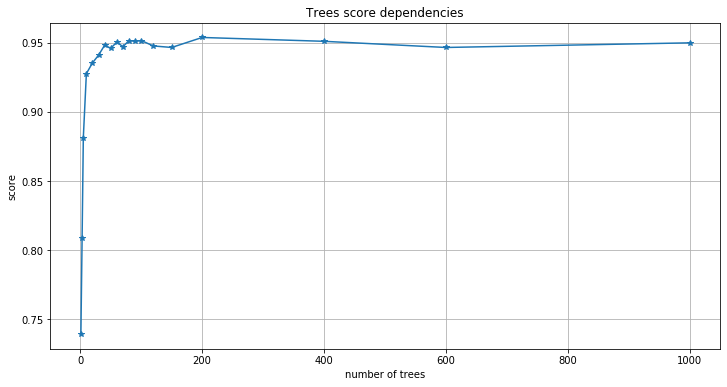

In [26]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(trees,rf_scoring,marker='*')
plt.xlabel("number of trees")
plt.ylabel("score")
plt.title("Trees score dependencies");

Таким образом:

1) Случайный лес сильно не переобучается с ростом количества деревьев;

2) При очень маленьком количестве деревьев (3,5,10) Случайный лес работает значительно хуже, чем при большом;

3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества; классификации, а затем качество существенно не меняется.



**Имеются заметные максимумы (выше на 0,005 или 0,5%)*

***Положение заметных максимумов зависит от random_seed*

#### 2) Зависимость качества от количества признаков

In [29]:
rf_scoring_2 = []
n_features = [2,4,8,16,24,32,48,64]
for feature in n_features:
    rf_estimator_iter=ensemble.RandomForestClassifier(max_features=feature)
    rf_scoring_2.append(model_selection.cross_val_score(rf_estimator_iter, X, y, cv=10).mean())

In [30]:
for a,b in zip(n_features, rf_scoring_2):
    print('{: <6} {: >4.6f}'.format(a,b))

2      0.952148
4      0.949370
8      0.952138
16     0.951567
24     0.943771
32     0.937641
48     0.932632
64     0.922052


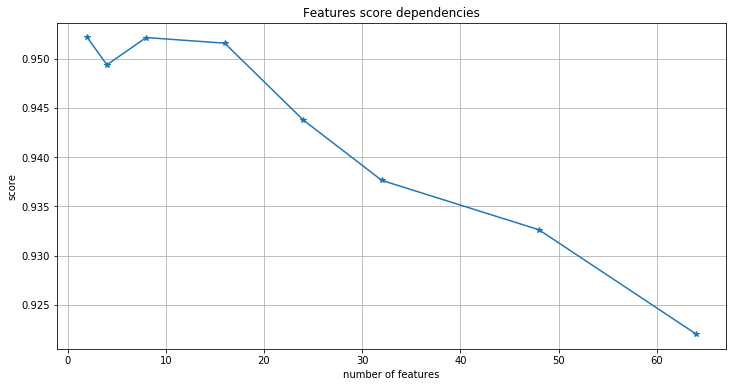

In [31]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(n_features,rf_scoring_2,marker='*')
plt.xlabel("number of features")
plt.ylabel("score")
plt.title("Features score dependencies");

4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

#### 3) Зависимость качества от глубины деревьев

In [33]:
%%time
rf_scoring_3 = []
t_depths = [2,4,8,16,24,32,48,64,128,256,512,1024]
for depth in t_depths:
    rf_estimator_iter=ensemble.RandomForestClassifier(max_depth=depth)
    rf_scoring_3.append(model_selection.cross_val_score(rf_estimator_iter, X, y, cv=10).mean())

In [34]:
for a,b in zip(t_depths, rf_scoring_3):
    print('{: <6} {: >4.6f}'.format(a,b))

2      0.797424
4      0.886462
8      0.940431
16     0.951024
24     0.949910
32     0.948240
48     0.949358
64     0.950462
128    0.953796
256    0.953799
512    0.951024
1024   0.951583


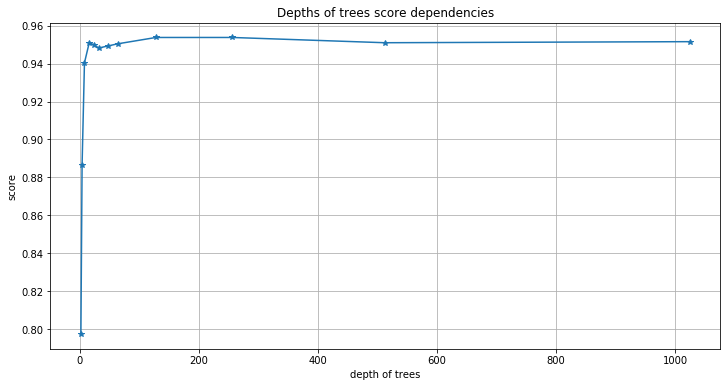

In [35]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.plot(t_depths,rf_scoring_3,marker='*')
plt.xlabel("depth of trees")
plt.ylabel("score")
plt.title("Depths of trees score dependencies");

7)  При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).